In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset from CSV file to Pandas DataFrame
spam_mail_data = pd.read_csv('email spam.csv')
spam_mail_data

,category,message
0,ham,"""Go until jurong point, crazy.. Available only..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"""Nah I don't think he goes to usf, he lives ar..."
...,...,...
5569,spam,"""This is the 2nd time we have tried 2 contact ..."
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"""Pity, * was in mood for that. So...any other ..."
5572,ham,The guy did some bitching but I acted like i'd...


In [3]:
# Replacing null values with empty string
spam_mail_data.fillna('',inplace=True)

In [4]:
# Finding duplicates value
spam_mail_data.duplicated().sum()

415

In [5]:
# Handling duplicate value
spam_mail_data.drop_duplicates(inplace=True)

In [6]:
spam_mail_data.duplicated().sum()

0

In [7]:
spam_mail_data['category'].value_counts()

ham     4518
spam     641
Name: category, dtype: int64

<AxesSubplot:xlabel='category', ylabel='count'>

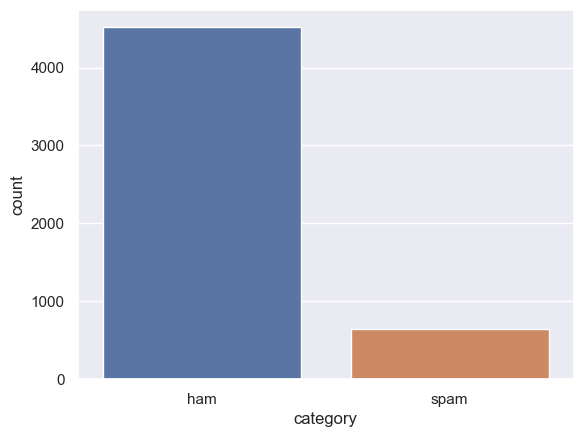

In [8]:
# Visualizing target column entities
sns.set()
sns.countplot(x='category',data=spam_mail_data)

# This Data is imbalanced

In [9]:
# Separating spam and ham data
ham = spam_mail_data[spam_mail_data['category']=='ham']
spam = spam_mail_data[spam_mail_data['category']=='spam']

In [10]:
ham

,category,message
0,ham,"""Go until jurong point, crazy.. Available only..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"""Nah I don't think he goes to usf, he lives ar..."
6,ham,Even my brother is not like to speak with me. ...
...,...,...
5567,ham,Huh y lei...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"""Pity, * was in mood for that. So...any other ..."
5572,ham,The guy did some bitching but I acted like i'd...


In [11]:
spam

,category,message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,"""FreeMsg Hey there darling it's been 3 week's ..."
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"""SIX chances to win CASH! From 100 to 20,000 p..."
...,...,...
5539,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5542,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5549,spam,"""Had your contract mobile 11 Mnths? Latest Mot..."
5568,spam,"""REMINDER FROM O2: To get 2.50 pounds free cal..."


# Under-Sampling

In [12]:
sampled_ham = ham.sample(641)
sampled_ham

,category,message
3020,ham,Wat time do u wan 2 meet me later?
1960,ham,Howz that persons story
3356,ham,Minimum walk is 3miles a day.
600,ham,I'm going out to buy mum's present ar.
2578,ham,Hey whats up? U sleeping all morning?
...,...,...
4466,ham,CHEERS FOR CALLIN BABE.SOZI CULDNT TALKBUT I W...
535,ham,"""I've not called you in a while. This is hopin..."
1551,ham,He says hi and to get your ass back to south t...
4659,ham,This message is from a great Doctor in India:-...


In [13]:
# Concatinating ham and sampled_ham column
ham_spam_data = pd.concat([sampled_ham,spam],axis=0)
ham_spam_data

,category,message
3020,ham,Wat time do u wan 2 meet me later?
1960,ham,Howz that persons story
3356,ham,Minimum walk is 3miles a day.
600,ham,I'm going out to buy mum's present ar.
2578,ham,Hey whats up? U sleeping all morning?
...,...,...
5539,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5542,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5549,spam,"""Had your contract mobile 11 Mnths? Latest Mot..."
5568,spam,"""REMINDER FROM O2: To get 2.50 pounds free cal..."


<AxesSubplot:xlabel='category', ylabel='count'>

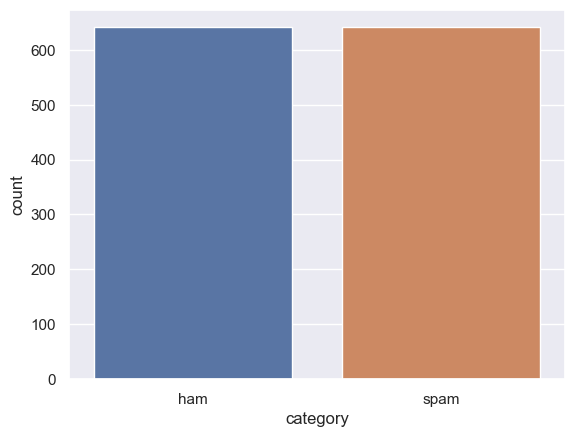

In [14]:
sns.set()
sns.countplot(x='category',data=ham_spam_data)

# Label Encoding for 'category' column


In [15]:
# Replacing ham as 0 and spam as 1
ham_spam_data.replace({"category":{"ham":0,"spam":1}},inplace=True)
ham_spam_data

,category,message
3020,0,Wat time do u wan 2 meet me later?
1960,0,Howz that persons story
3356,0,Minimum walk is 3miles a day.
600,0,I'm going out to buy mum's present ar.
2578,0,Hey whats up? U sleeping all morning?
...,...,...
5539,1,Want explicit SEX in 30 secs? Ring 02073162414...
5542,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5549,1,"""Had your contract mobile 11 Mnths? Latest Mot..."
5568,1,"""REMINDER FROM O2: To get 2.50 pounds free cal..."


In [16]:
# Extracting Independent and Depentdent variable
x = ham_spam_data['message']
y = ham_spam_data['category']

In [17]:
x

3020                   Wat time do u wan 2 meet me later?
1960                              Howz that persons story
3356                        Minimum walk is 3miles a day.
600                I'm going out to buy mum's present ar.
2578                Hey whats up? U sleeping all morning?
                              ...                        
5539    Want explicit SEX in 30 secs? Ring 02073162414...
5542    ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5549    "Had your contract mobile 11 Mnths? Latest Mot...
5568    "REMINDER FROM O2: To get 2.50 pounds free cal...
5569    "This is the 2nd time we have tried 2 contact ...
Name: message, Length: 1282, dtype: object

In [18]:
y

3020    0
1960    0
3356    0
600     0
2578    0
       ..
5539    1
5542    1
5549    1
5568    1
5569    1
Name: category, Length: 1282, dtype: int64

In [19]:
# Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [20]:
print(ham_spam_data.shape,x_train.shape,x_test.shape)

(1282, 2) (1025,) (257,)


# Feature Extraction

In [21]:
# Transforming text data to feature vector so that it can be used to Logistic Regession model
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x_train_vectorizer = vectorizer.fit_transform(x_train).toarray()
x_test_vectorizer = vectorizer.transform(x_test).toarray()

In [22]:
x_test

1407    "URGENT, IMPORTANT INFORMATION FOR O2 USER. TO...
2938    Lol yep did that yesterday. Already got my fir...
1461    "Yalru lyfu astne chikku.. Bt innu mundhe lyf ...
955             Filthy stories and GIRLS waiting for your
5458    For the most sparkling shopping breaks from 45...
                              ...                        
2590    Join the UK's horniest Dogging service and u c...
1458    CLAIRE here am havin borin time & am now alone...
1930    Free 1st week entry 2 TEXTPOD 4 a chance 2 win...
1880    U have a secret admirer who is looking 2 make ...
3792    "Twinks, bears, scallies, skins and jocks are ...
Name: message, Length: 257, dtype: object

In [23]:
x_test_vectorizer

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Training the Logistic Regression model to train data

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_vectorizer,y_train)

LogisticRegression()

# Model Evaluation

In [25]:
# Predicting training dataset
predicted_train_data = model.predict(x_train_vectorizer)
predicted_train_data

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [26]:
# Checking the accuray of training data 
from sklearn.metrics import accuracy_score
score = accuracy_score(predicted_train_data,y_train)
print("Training Data Accuracy:",score)

Training Data Accuracy: 0.9775609756097561


In [27]:
# Predicting test dataset
predicted_test_data = model.predict(x_test_vectorizer)
predicted_test_data

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [28]:
# Checking the accuray of test data 
from sklearn.metrics import accuracy_score
score = accuracy_score(predicted_test_data,y_test)
print("Test Data Accuracy:",score)

Test Data Accuracy: 0.9494163424124513


# Creating confusion matrix and visualizing

<AxesSubplot:>

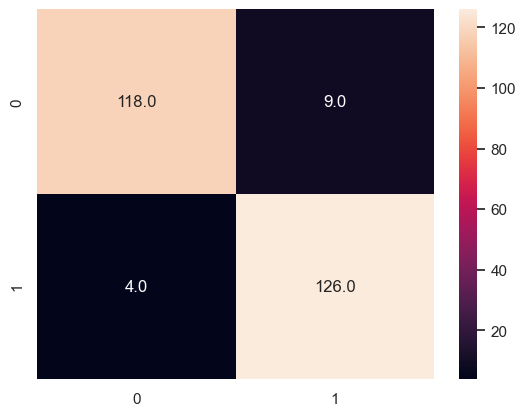

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predicted_test_data,y_test)

sns.set()
sns.heatmap(cm,annot=True,fmt='.1f')

# Creating a Predictive System

In [31]:
# Getting input
input_data = ['Free entry in 2 a wkly camp to win FA Cup final tkls 21July 2023.Text FA to 87121 to receive entry question.']

# Vectorizing the input_data
vectorized_input_data = vectorizer.transform(input_data).toarray()

prediction = model.predict(vectorized_input_data)

if prediction[0] == 0:
    print("The Email is Ham.")
else:
    print("The Email is Spam.")

The Email is Spam.
